# Salary Analysis - How well do jobs and skills pay for Data Analysts ?

### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analyst
3. Visualize for highest paying skills and most demanded skills

### Import libraries and data

In [139]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

### Salary distributions

In [157]:
df_salary_distributions = df.copy()
top_roles = df_salary_distributions['job_title_short'].value_counts().head(6).index.tolist()
top_roles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer',
 'Senior Data Engineer']

In [141]:
df_top_roles = df_salary_distributions[df['job_title_short'].isin(top_roles)]
df_top_roles

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [142]:
df_salary_top_roles = df_top_roles[['job_title_short','salary_year_avg']]
df_salary_top_roles = df_salary_top_roles.dropna(subset='salary_year_avg').sort_values(by='salary_year_avg', ascending=False)
df_salary_top_roles

,job_title_short,salary_year_avg
554784,Data Scientist,960000.0
168402,Data Analyst,650000.0
387378,Data Scientist,585000.0
160521,Data Scientist,550000.0
404932,Data Engineer,525000.0
...,...,...
213687,Data Engineer,24000.0
535260,Data Engineer,23496.0
130855,Data Engineer,20000.0
380187,Business Analyst,16500.0


In [143]:
job_order = df_salary_top_roles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Engineer', 'Data Scientist', 'Data Engineer',
       'Software Engineer', 'Data Analyst', 'Business Analyst'],
      dtype='object', name='job_title_short')

Text(0, 0.5, '')

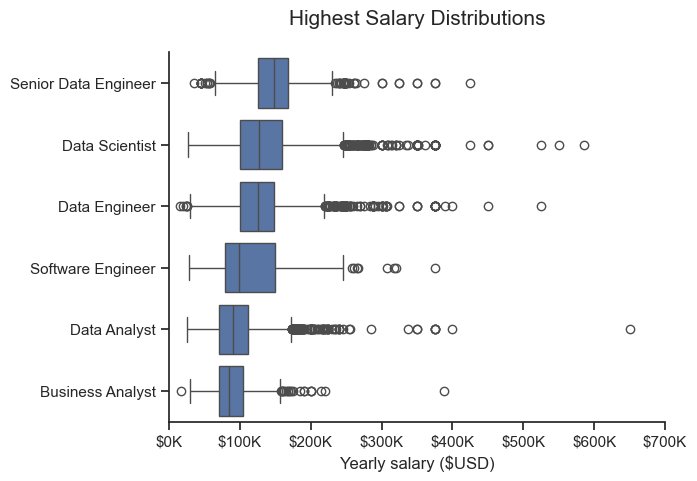

In [144]:
# Plotting
sns.boxplot(
    data=df_salary_top_roles,
    x='salary_year_avg',
    y='job_title_short',
    order=job_order
)

# Formatting the plot
sns.despine()
sns.set_theme(style='ticks')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))
plt.xlim(0,700000)
plt.title('Highest Salary Distributions', fontsize=15, pad=20)
plt.xlabel('Yearly salary ($USD)')
plt.ylabel('')

### Historgram

In [145]:
# Sorting job titles by yearly median salary
job_titles = df_salary_top_roles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_titles

Index(['Senior Data Engineer', 'Data Scientist', 'Data Engineer',
       'Software Engineer', 'Data Analyst', 'Business Analyst'],
      dtype='object', name='job_title_short')

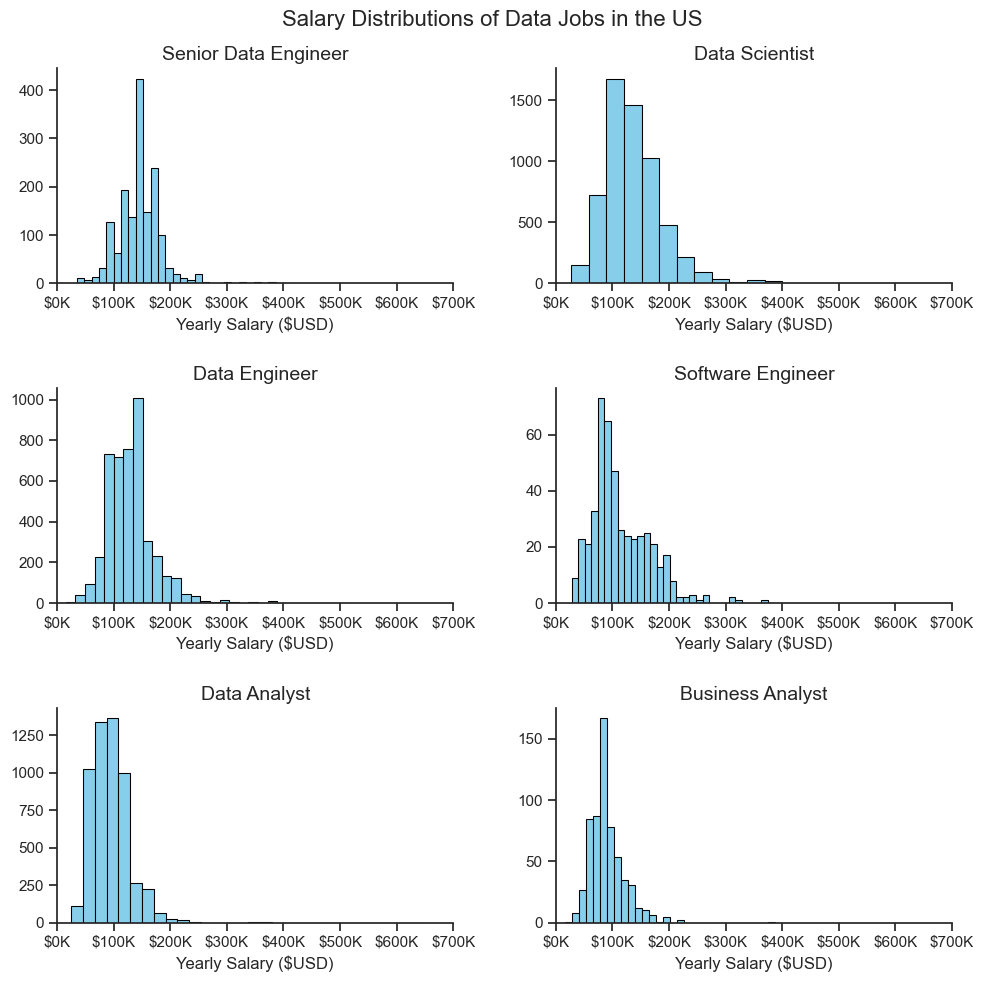

In [146]:
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.flatten()

for x, job_title in enumerate(job_titles):
    df_plot = df_salary_top_roles[df_salary_top_roles['job_title_short'] == job_title]
    sns.histplot(
        data=df_plot,
        ax=ax[x],
        legend=False,
        bins=30,
        edgecolor='black'
    )

    # Change the color of each bar
    for patch in ax[x].patches:
        patch.set_facecolor(color='skyblue')  # Cycle through colors list

    sns.despine()
    sns.set_theme(style='ticks')

    ax[x].set_xlim(0,700000)
    ax[x].set_title(job_title, fontsize=14)
    ax[x].set_xlabel('Yearly Salary ($USD)',fontsize=12)
    ax[x].set_ylabel('')
    ax[x].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.suptitle('Salary Distributions of Data Jobs in the US', fontsize=16)
fig.tight_layout(h_pad=2, w_pad=2)

### Top paid skills vs Most in-demand skills in Salary

In [147]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA = df_DA.dropna(subset='salary_year_avg')
df_DA = df_DA.explode('job_skills')
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,looker,"{'analyst_tools': ['looker'], 'programming': [..."


In [156]:
df_skills_count_median = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_demand_skills = df_skills_count_median.sort_values(by='count', ascending=False).head(10).sort_values(by='median',ascending=False)
df_top_paid = df_skills_count_median.sort_values(by='median', ascending=False).head(10)

In [155]:
df_demand_skills

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


In [154]:
df_top_paid

,count,median
job_skills,,
svn,1,400000.0
solidity,1,179000.0
dplyr,3,167500.0
gitlab,7,163782.0
terraform,3,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0


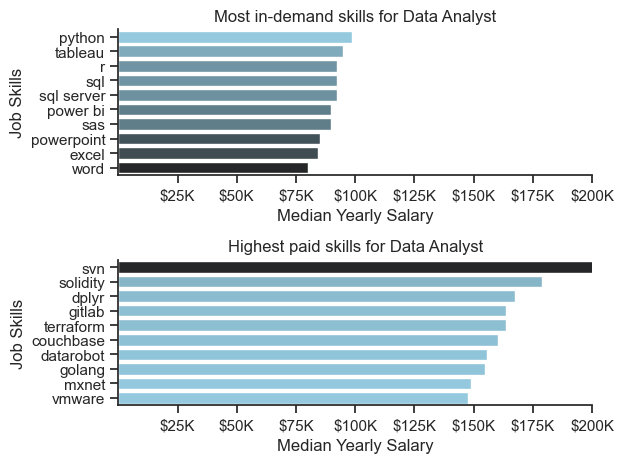

In [153]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

# Top in-demand skills
sns.barplot(
    data=df_demand_skills,
    x='median',
    y='job_skills',
    hue='median',
    palette='dark:skyblue',
    legend=False,
    ax=ax[0]
)
ax[0].set_xlabel('Median Yearly Salary')
ax[0].set_ylabel('Job Skills')
ax[0].set_xlim(10,200000)
ax[0].set_title('Most in-demand skills for Data Analyst')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

# Top paid skills
sns.barplot(
    data=df_top_paid,
    x='median',
    y='job_skills',
    hue='median',
    palette='dark:skyblue_r',
    legend=False,
    ax=ax[1]
)
ax[1].set_xlabel('Median Yearly Salary')
ax[1].set_ylabel('Job Skills')
ax[1].set_xlim(10,200000)
ax[1].set_title('Highest paid skills for Data Analyst')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

sns.despine()

fig.tight_layout(h_pad=1)